In [0]:
!pip install fastai

In [0]:
!pip install glob2

In [3]:
!wget --header="Host: storage.googleapis.com" --header="User-Agent: Mozilla/5.0 (Macintosh; Intel Mac OS X 10_13_4) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/68.0.3440.106 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8" --header="Accept-Language: en-US,en;q=0.9,tr;q=0.8" "https://storage.googleapis.com/kaggle-competitions-data/kaggle/7880/all.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1537287516&Signature=btKQegC%2BzluynNJiUhGpLK7npsgsJOXoIe%2FaS5mzSy02CVKfKscXteRzP04GkRmuexEI1yOdMR%2B%2Bb%2B6XtHIm2%2BpxWxbhwM1%2B0KY2OQuv7wpTEbtW5aFpDrnmwoPyYiRFM3A5HEf12Cj6rT6RTZf37TfiEZ4k%2FA2fU54R%2B1kVFjPIe9GXBTl01ppX8sH9LNsU7OGXh5l1Z%2F6OPg4EMi%2FnHpFjgi7nDwuwh9%2B035NBqxHSSKMW%2Bm9c0pq%2BVerMOrEEF8%2FKr9eiYtwBu6IDOIs1fuRwc6tW90kccNeuThnJz%2BsZXftht2EW%2FxKod4HpGPVH%2FD9HmfFzL9EOHyAcjIKFgA%3D%3D" -O "all.zip" -c


Redirecting output to ‘wget-log’.


In [3]:
!ls

labels.csv   sample_data	    test  train
lr_plot.png  sample_submission.csv  tmp   wget-log


In [5]:
!unzip all.zip 

Archive:  all.zip
  inflating: train.zip               
  inflating: sample_submission.csv   
  inflating: test.zip                


In [0]:
!unzip test.zip
!unzip train.zip

In [0]:
!ls train

In [0]:
!rm test.zip
!rm train.zip
!rm all.zip

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai.imports import *
from fastai.torch_imports import *
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

In [0]:
torch.cuda.set_device(0)


In [6]:
torch.backends.cudnn.enabled


True

In [0]:
PATH = "/content/"
sz = 224
arch = resnet50
bs = 48

In [0]:
from glob2 import glob
import pandas as pd


df = pd.DataFrame(columns=["file", "species"])

for image in glob("train/**/*.png"):
    dir_ = image.split('/')
    file_, species = dir_[-1], dir_[-2]

    df = df.append({
    "file": file_,
    "species": species.replace(" ", "_")
     }, ignore_index=True)

df.to_csv('labels.csv', index=False)

In [0]:
label_csv = f'{PATH}labels.csv'
label_df = pd.read_csv(label_csv)


In [0]:
!mv /content/train/**/*.png /content/train

In [0]:
!rm -r /content/train/**/

In [71]:
!ls 

labels.csv  sample_submission.csv  test  train


In [0]:
label_csvlabel_c  = f'{PATH}labels.csv'
n = len(list(open(label_csv))) - 1 # header is not counted (-1)
val_idxs = get_cv_idxs(n)

In [18]:
n

4750

In [19]:
len(val_idxs)

950

In [20]:
label_df.head()

,file,species
0,a5f531177.png,Scentless_Mayweed
1,5186c72ca.png,Scentless_Mayweed
2,870b828ff.png,Scentless_Mayweed
3,6f6b0c523.png,Scentless_Mayweed
4,0e6d5af38.png,Scentless_Mayweed


In [21]:
label_df.pivot_table(index="species", aggfunc=len).sort_values('file', ascending=False)

,file
species,
Loose_Silky-bent,654
Common_Chickweed,611
Scentless_Mayweed,516
Small-flowered_Cranesbill,496
Fat_Hen,475
Charlock,390
Sugar_beet,385
Cleavers,287
Black-grass,263


In [0]:
tfms = tfms_from_model(arch, sz, aug_tfms=transforms_top_down, max_zoom=1.1)
data = ImageClassifierData.from_csv(PATH, 'train', f'{PATH}labels.csv', test_name='test',
                                       val_idxs=val_idxs, tfms=tfms, bs=bs)

In [45]:
fn = PATH + data.trn_ds.fnames[0]; fn


'/content/train/0012f11c4.png'

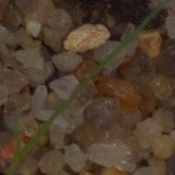

In [46]:
img = PIL.Image.open(fn); img


In [47]:
img.size

(175, 175)

In [0]:
size_d = {k: PIL.Image.open(PATH + k).size for k in data.trn_ds.fnames}

In [0]:
row_sz, col_sz = list(zip(*size_d.values()))

In [0]:
row_sz = np.array(row_sz); col_sz = np.array(col_sz)

In [51]:
row_sz[:5]

array([ 175,  140,  756,  350, 1193])

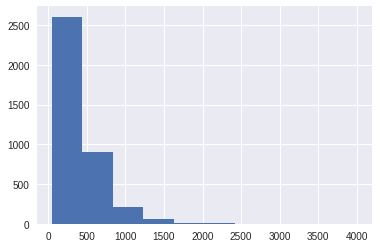

In [52]:
plt.hist(row_sz);

(array([1008.,  832.,  269.,  431.,  371.,  261.,  193.,  109.,   80.,   64.]),
 array([ 49., 144., 239., 334., 429., 524., 619., 714., 809., 904., 999.]),
 <a list of 10 Patch objects>)

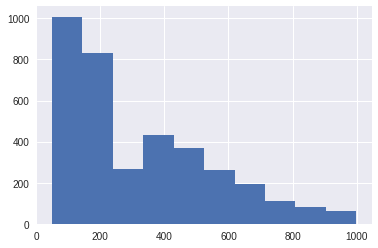

In [53]:
plt.hist(row_sz[row_sz < 1000])

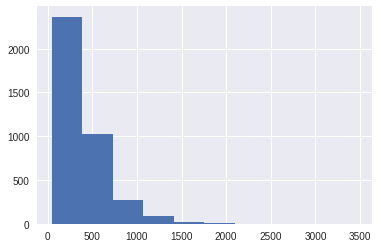

In [54]:
plt.hist(col_sz);

(array([1008.,  829.,  269.,  422.,  372.,  267.,  191.,  115.,   78.,   69.]),
 array([ 49. , 143.4, 237.8, 332.2, 426.6, 521. , 615.4, 709.8, 804.2, 898.6, 993. ]),
 <a list of 10 Patch objects>)

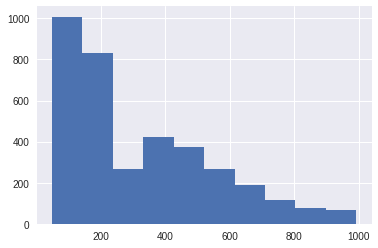

In [55]:
plt.hist(col_sz[col_sz < 1000])

In [56]:
len(data.trn_ds), len(data.test_ds)

(3800, 794)

In [58]:
len(data.classes), data.classes[:12]

(12,
 ['Black-grass',
  'Charlock',
  'Cleavers',
  'Common_Chickweed',
  'Common_wheat',
  'Fat_Hen',
  'Loose_Silky-bent',
  'Maize',
  'Scentless_Mayweed',
  'Shepherds_Purse',
  'Small-flowered_Cranesbill',
  'Sugar_beet'])

In [0]:
def get_data(sz, bs): # sz: image size, bs: batch size
    tfms = tfms_from_model(arch, sz, aug_tfms=transforms_top_down, max_zoom=1.1)
    data = ImageClassifierData.from_csv(PATH, 'train', f'{PATH}labels.csv', test_name='test',
                                       val_idxs=val_idxs, tfms=tfms, bs=bs)
    
    return data if sz > 300 else data.resize(340, 'tmp')

In [12]:
data = get_data(sz, bs)

In [0]:
learn = ConvLearner.pretrained(arch, data, precompute=True)

In [19]:
lrf=learn.lr_find()

 90%|█████████ | 72/80 [00:01<00:00, 56.91it/s, loss=9.4] 


In [0]:
learn.sched.plot_lr()


In [0]:
learn.sched.plot()

In [23]:
learn.fit(0.05, 2)


epoch      trn_loss   val_loss   accuracy   
    0      0.713223   0.565128   0.816842  
    1      0.614266   0.433837   0.842105  



[array([0.43384]), 0.8421052652911136]

In [0]:
learn.precompute = False

In [25]:
learn.fit(0.05, 5, cycle_len=1)


epoch      trn_loss   val_loss   accuracy   
    0      0.664328   0.393006   0.869474  
    1      0.629568   0.364822   0.867368  
    2      0.570105   0.36506    0.865263  
    3      0.562538   0.37172    0.867368  
    4      0.549134   0.365263   0.869474  



[array([0.36526]), 0.8694736897317987]

In [0]:
learn.save('224_pre')

In [0]:
learn.load('224_pre')

In [26]:
learn.set_data(get_data(299, bs)) 
learn.freeze()
learn.bn_freeze(True)

In [37]:
learn.fit(0.05, 3, cycle_len=1)


epoch      trn_loss   val_loss   accuracy   
    0      1.237199   0.631217   0.777895  
    1      0.909174   0.507838   0.827368  
    2      0.722966   0.485377   0.847368  


[array([0.48538]), 0.8473684205506977]

In [0]:
lr=np.array([0.00666,0.02,0.06])


In [0]:
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)


In [30]:
log_preds, y = learn.TTA()
probs = np.mean(np.exp(log_preds),0)
accuracy_np(probs, y), metrics.log_loss(y, probs)

(0.9389473684210526, 0.2191228696056328)